## Тема: Алгоритми пошуку  
Мета: засвоїти варіанти реалізації алгоритмів пошуку засобами Python і методи оцінювання їх складності.

#### Виконала: Лабущак Анжела  
#### Група: КН-24-1  

## 1. Налаштування середовища

In [80]:

import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Лінійний пошук

In [83]:
def linear_search(a_list, x):
    i, length = 0, len(a_list)
    while i < length and x != a_list[i]:
        i += 1
    return i if i < length else -1

linear_search([10, 20, 30, 40], 30)

2

## 3. Бінарний пошук (рекурсивна реалізація)

In [86]:
def bin_search(a_list, x, left, right):
    if left > right or len(a_list) == 0:
        return -1
    middle = (left + right) // 2
    if a_list[middle] == x:
        return middle
    elif a_list[middle] < x:
        return bin_search(a_list, x, middle + 1, right)
    else:
        return bin_search(a_list, x, left, middle - 1)

bin_search(list(range(10, 21)), 15, 0, 10)


5

## 4. Емпіричне порівняння часу виконання

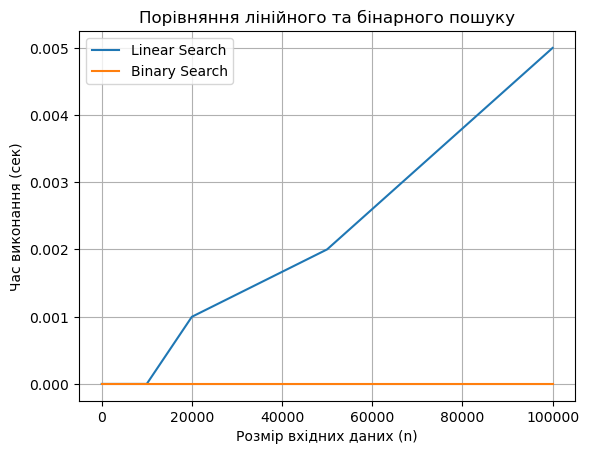

In [89]:
def time_search(search_func, sizes):
    results = []
    for n in sizes:
        data = list(range(n))
        start = time.time()
        search_func(data, -1)
        end = time.time()
        results.append((n, end - start))
    return pd.DataFrame(results, columns=["n", "time"])

sizes = [10, 100, 1000, 5000, 10000, 20000, 50000, 100000]

lin_df = time_search(lambda a, x: linear_search(a, x), sizes)
bin_df = time_search(lambda a, x: bin_search(a, x, 0, len(a) - 1), sizes)

plt.plot(lin_df["n"], lin_df["time"], label="Linear Search")
plt.plot(bin_df["n"], bin_df["time"], label="Binary Search")
plt.xlabel("Розмір вхідних даних (n)")
plt.ylabel("Час виконання (сек)")
plt.title("Порівняння лінійного та бінарного пошуку")
plt.legend()
plt.grid(True)
plt.show()


## 5. Висновок

Алгоритм бінарного пошуку є значно ефективнішим при великих об’ємах даних, проте вимагає попереднього сортування масиву.

## 6. Відповіді на контрольні питання

Асимптотична складність лінійного пошуку — O(n).

Бінарний пошук має складність — O(log n).

Для linear_search функція повертає DataFrame з полями n і time — показує як змінюється час з розміром.

Аналогічно для bin_search, але значення часу значно менші.

На графіку видно, що бінарний пошук ефективніший при великих об'ємах даних.

В діапазоні до 1000 різниця в часі мінімальна, після чого перевага бінарного пошуку зростає.